You might need to change working directory, in case code doesn't work!<br>

```python
**to check**
import os
print(os.getcwd())
```

```python
**to set**
os.chdir('c:/Users/arsen/Desktop/new_ML')
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = 'cleaned_movies.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,title,genres,user_rating,keywords,director,adult,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,Unknown,War,Western
0,Moana 2,"['Animation', 'Adventure', 'Family', 'Comedy']",0.7000,"sea, ocean, villain, musical, sequel",David G. Derrick Jr.,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Venom: The Last Dance,"['Science Fiction', 'Action', 'Adventure']",0.6443,"hero, superhero, anti hero, villain, alien lif...",Kelly Marcel,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Smile 2,"['Horror', 'Mystery']",0.6646,"drug dealer, new york city, suicide, concert, ...",Parker Finn,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,The Wild Robot,"['Animation', 'Science Fiction', 'Family']",0.8400,"robot, based on children's book, adopted son, ...",Chris Sanders,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,Absolution,"['Action', 'Drama', 'Crime', 'Thriller']",0.6200,gangster,Hans Petter Moland,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# Let's check for null falues
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            4894 non-null   object 
 1   genres           4894 non-null   object 
 2   user_rating      4894 non-null   float64
 3   keywords         4894 non-null   object 
 4   director         4894 non-null   object 
 5   adult            4894 non-null   int64  
 6   Action           4894 non-null   int64  
 7   Adventure        4894 non-null   int64  
 8   Animation        4894 non-null   int64  
 9   Comedy           4894 non-null   int64  
 10  Crime            4894 non-null   int64  
 11  Documentary      4894 non-null   int64  
 12  Drama            4894 non-null   int64  
 13  Family           4894 non-null   int64  
 14  Fantasy          4894 non-null   int64  
 15  History          4894 non-null   int64  
 16  Horror           4894 non-null   int64  
 17  Music         


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            4894 non-null   object 
 1   genres           4894 non-null   object 
 2   user_rating      4894 non-null   float64
 3   keywords         4894 non-null   object 
 4   director         4894 non-null   object 
 5   adult            4894 non-null   int64  
 6   Action           4894 non-null   int64  
 7   Adventure        4894 non-null   int64  
 8   Animation        4894 non-null   int64  
 9   Comedy           4894 non-null   int64  
 10  Crime            4894 non-null   int64  
 11  Documentary      4894 non-null   int64  
 12  Drama            4894 non-null   int64  
 13  Family           4894 non-null   int64  
 14  Fantasy          4894 non-null   int64  
 15  History          4894 non-null   int64  
 16  Horror           4894 non-null   int64  
 17

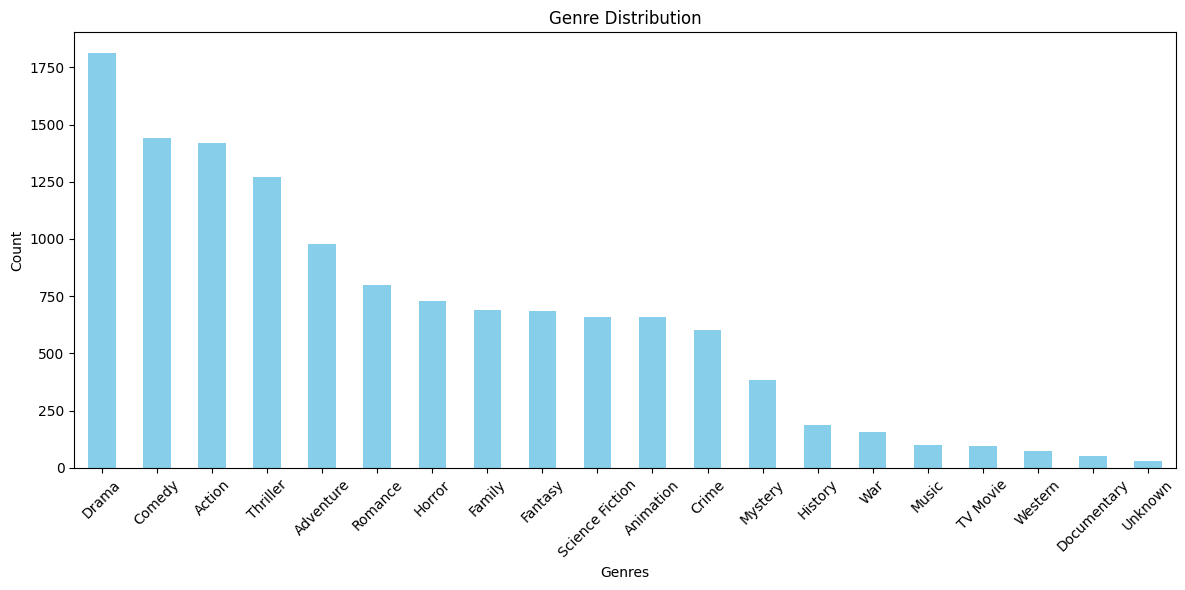

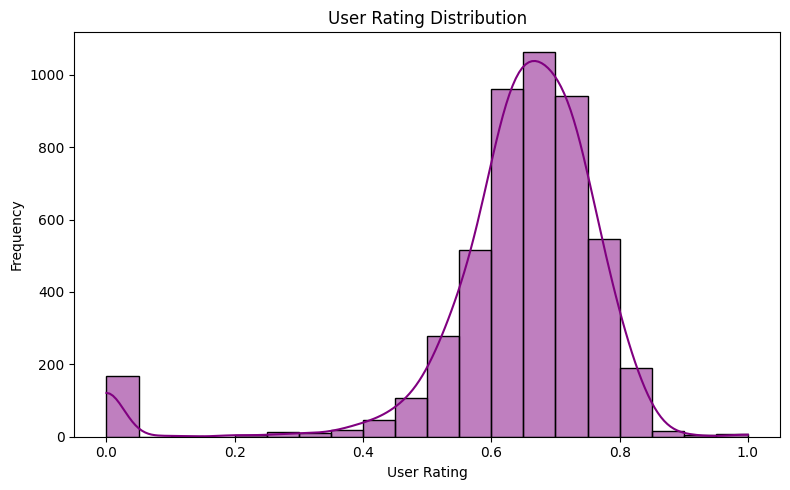

C:\Users\arsen\AppData\Local\Temp\ipykernel_20108\3062656526.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='Frequency', y='Keyword', palette='viridis')


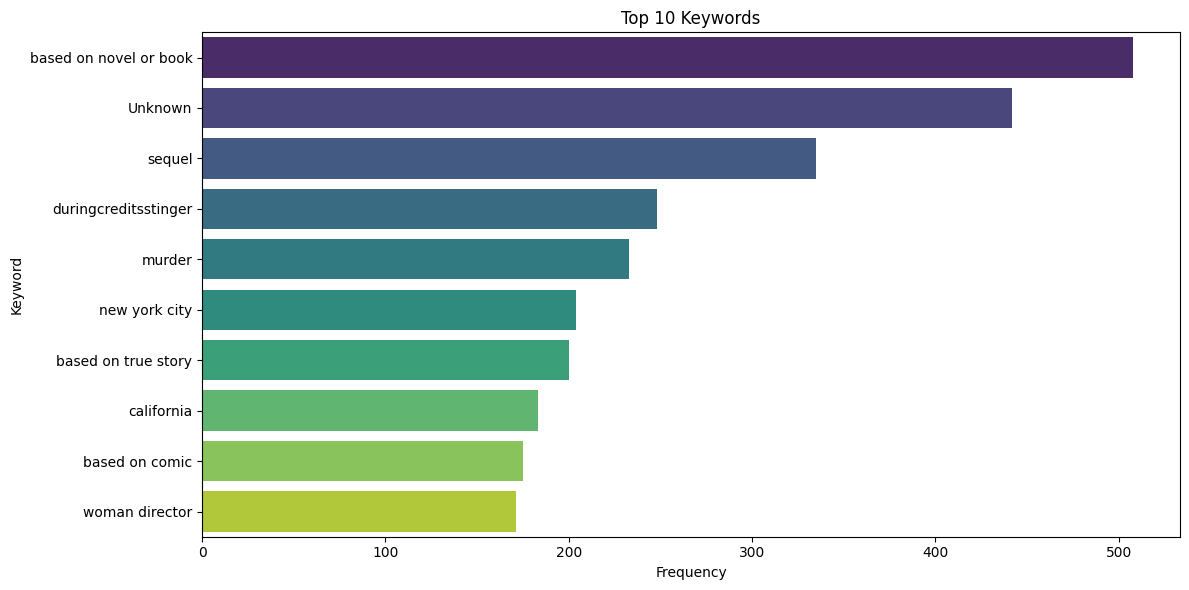

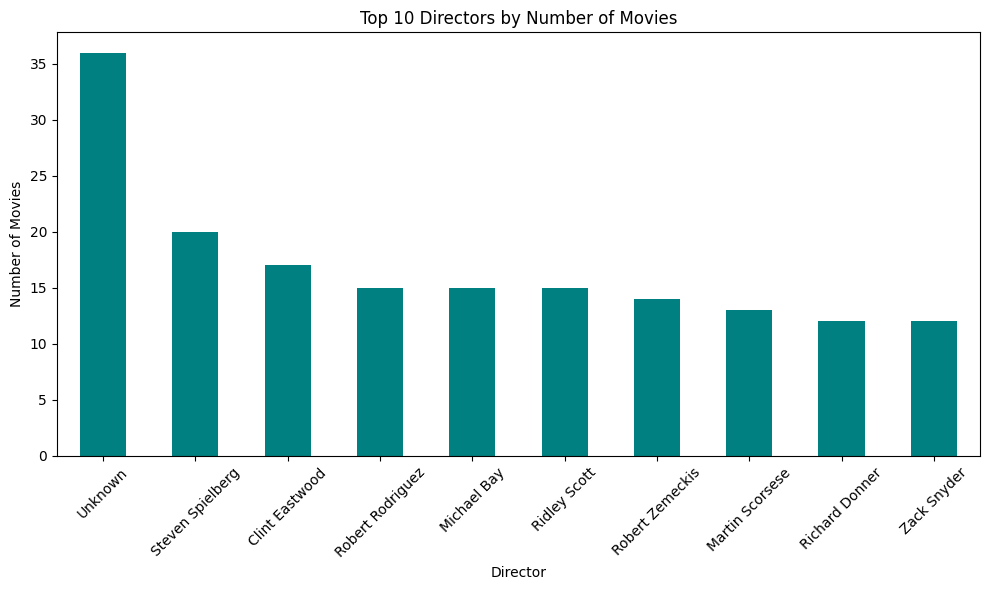

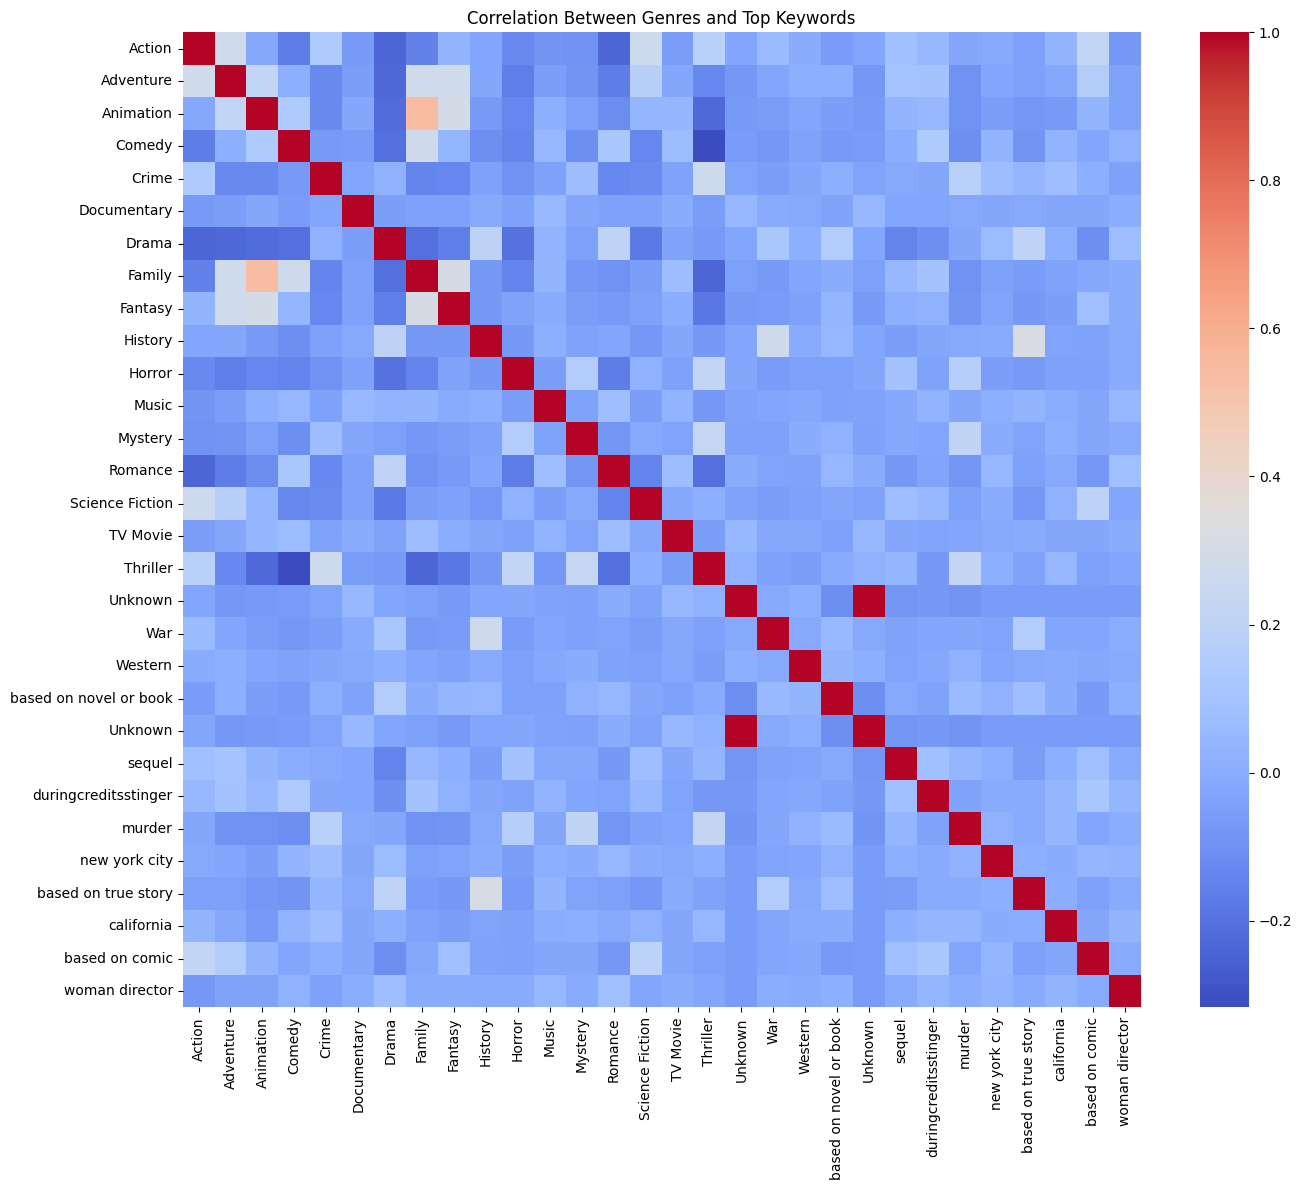

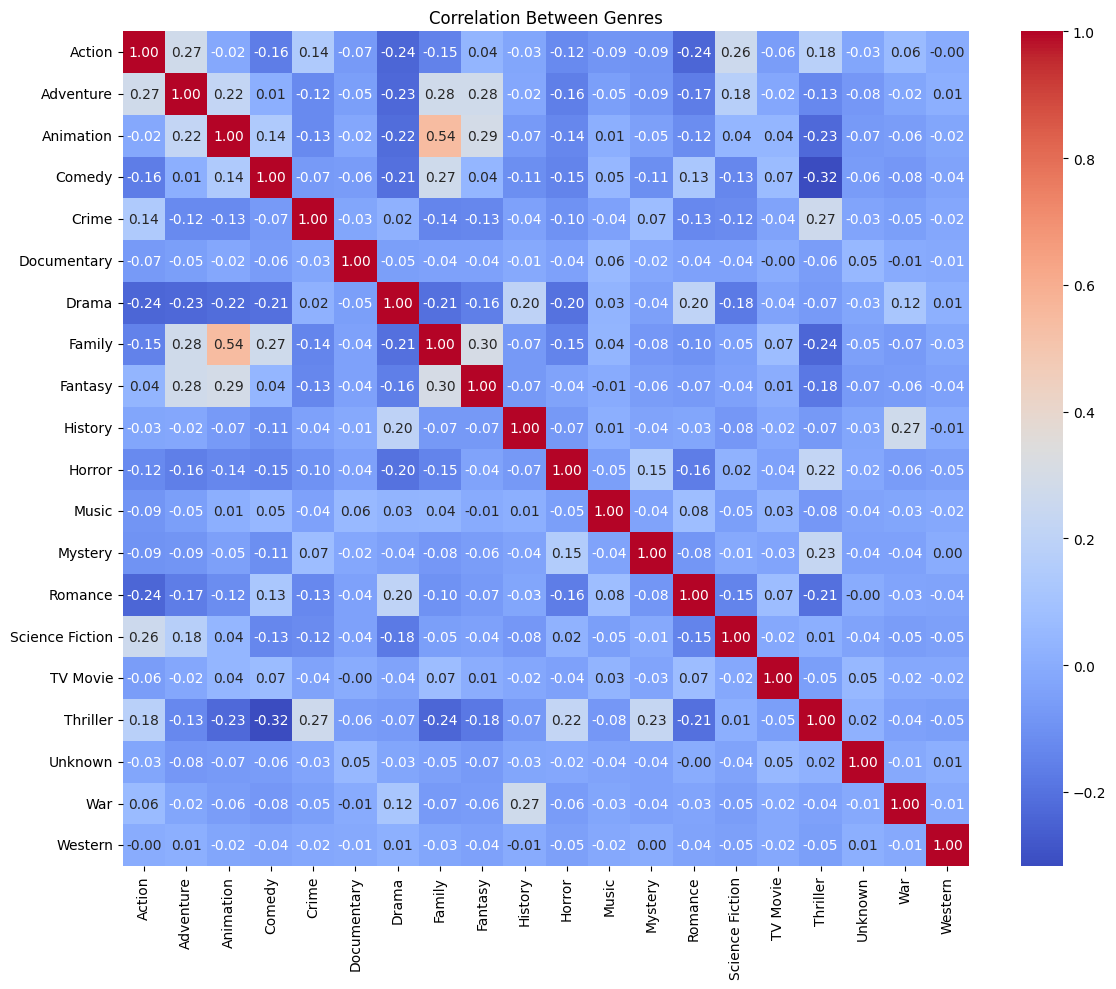


Key Insights:

1. The most frequent genre is: Drama with 1812 movies.
2. The average user rating is: 0.64
3. The keyword analysis reveals the most common themes include elements like:
based on novel or book, Unknown, sequel, duringcreditsstinger, murder, new york city, based on true story, california, based on comic, woman director
4. The top 10 directors by number of movies include:
director
Unknown             36
Steven Spielberg    20
Clint Eastwood      17
Robert Rodriguez    15
Michael Bay         15
Ridley Scott        15
Robert Zemeckis     14
Martin Scorsese     13
Richard Donner      12
Zack Snyder         12
Name: count, dtype: int64
5. The correlation analysis between genres and top keywords highlights potential thematic overlaps.
Number of adult movies: 824


In [ ]:
# --- Statistical Analysis ---
# Genre Distribution
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
    'Science Fiction', 'TV Movie', 'Thriller', 'Unknown', 'War', 'Western'
]

genre_counts = data[genre_columns].sum().sort_values(ascending=False)

# User Rating Distribution
user_rating_stats = data['user_rating'].describe()
print("\nUser Rating Statistics:\n", user_rating_stats)

# --- Visualizations ---
# Genre Distribution Visualization
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# User Rating Distribution Visualization
plt.figure(figsize=(8, 5))
sns.histplot(data['user_rating'], bins=20, kde=True, color='purple')
plt.title('User Rating Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Keyword Analysis - Top Keywords
keywords_list = data['keywords'].dropna().str.split(',').sum()
keywords_counter = Counter([kw.strip() for kw in keywords_list])
most_common_keywords = keywords_counter.most_common(10)

# Keyword Frequency Visualization
keywords_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data=keywords_df, x='Frequency', y='Keyword', palette='viridis')
plt.title('Top 10 Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

# --- New Analysis: Movies per Director ---
director_counts = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- New Analysis: Keyword-Genre Heatmap ---
# Creating a binary matrix for keyword presence for the top 10 keywords
def keyword_presence(row, keyword):
    return int(keyword in row)

for keyword, _ in most_common_keywords:
    data[keyword] = data['keywords'].fillna('').apply(lambda x: keyword_presence(x, keyword))

keyword_genre_corr = data[genre_columns + [k[0] for k in most_common_keywords]].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(keyword_genre_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Between Genres and Top Keywords')
plt.tight_layout()
plt.show()

# --- New Analysis: Genre Popularity Correlation ---
genre_corr = data[genre_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Genres')
plt.tight_layout()
plt.show()

# --- Insights ---
# Summarizing key insights
print("\nKey Insights:\n")
print("1. The most frequent genre is:", genre_counts.idxmax(), "with", genre_counts.max(), "movies.")
print("2. The average user rating is:", round(user_rating_stats['mean'], 2))
print("3. The keyword analysis reveals the most common themes include elements like:")
print(", ".join([kw for kw, _ in most_common_keywords]))
print("4. The top 10 directors by number of movies include:")
print(director_counts)
print("5. The correlation analysis between genres and top keywords highlights potential thematic overlaps.")
# Count the number of adult movies
num_adult_movies = data['adult'].sum()
print(f"Number of adult movies: {num_adult_movies}")

